## Importing the libraries

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Working with the dataset

#### importing the dataset and getting the 1st 5 rows of data

In [2]:
dataset=pd.read_csv("cyberbullying_tweets.csv")    #importing the dataset            

In [4]:
dataset.shape

(47692, 2)

In [5]:
dataset.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


#### Visualing the value counts

In [6]:
def piechart(cl):
    lst=[]
    lst1=list(dataset[cl].value_counts())
    y=np.array(lst1)
    labels=dataset[cl].unique().tolist()
    explode=[0.2]
    fig = plt.figure()
    for i in range(len(labels)-1):
        explode.append(0)
    print("The plot for ",cl," is: \n")
    try:
        plt.pie(y, labels = labels,explode=explode,autopct='%1.1f%%',shadow=True);
        plt.tight_layout()
        fig.savefig('piechart.png')
        return "Pie chart Saved succesfully"
    except:
        return "Input column has Null values"

In [7]:
import numpy as np

The plot for  cyberbullying_type  is: 



'Pie chart Saved succesfully'

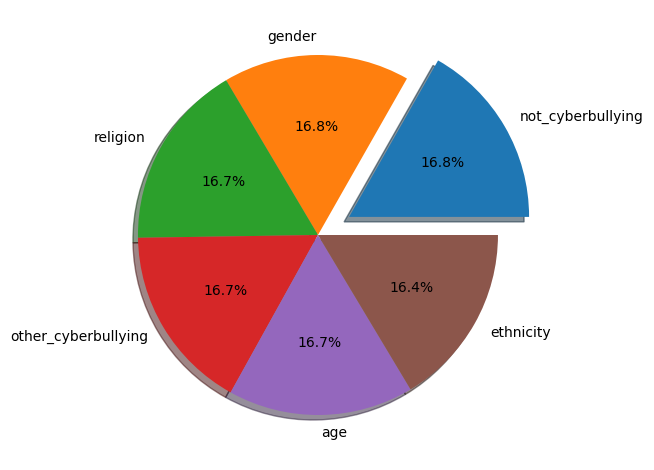

In [228]:
piechart("cyberbullying_type")

#### Minor data encoding

In [8]:
# Encoding the classes with numbers
def change_type(data):
    if data=="religion":
        return 3

    
    elif data=="age":
        return 1


    elif data=="gender":
        return 2


    elif data=="other_cyberbullying":
        return 4


    if data=="ethnicity":
        return 5
    else:
        return 0

In [9]:
dataset["cyberbullying_type"]=dataset["cyberbullying_type"].apply(change_type)

In [10]:
dataset.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",0
1,Why is #aussietv so white? #MKR #theblock #ImA...,0
2,@XochitlSuckkks a classy whore? Or more red ve...,0
3,"@Jason_Gio meh. :P thanks for the heads up, b...",0
4,@RudhoeEnglish This is an ISIS account pretend...,0


## Natural Language Processing

In [11]:
dataset["tweet_text"][0]

'In other words #katandandre, your food was crapilicious! #mkr'

### removing punctuations

In [12]:
pattern = r'[^a-zA-Z0-9 ]'
def rem_punc(val):
    cleaned_text = re.sub(pattern, '', val)
    return cleaned_text
            

In [13]:
dataset["tweet_text_new"]=dataset["tweet_text"].apply(rem_punc)

In [14]:
dataset["tweet_text_new"][0]

'In other words katandandre your food was crapilicious mkr'

### removing stopwords

In [15]:
import nltk
from nltk.corpus import stopwords

# nltk.download('stopwords')  # Download stopwords data if you haven't already

def remove_stopwords(val):
    words = val.split()
    filtered_words = [word for word in words if word.lower() not in stopwords.words('english')]
    return ' '.join(filtered_words)


dataset["tweet_text_new"]=dataset["tweet_text_new"].apply(remove_stopwords)




In [16]:
dataset["tweet_text_new"][0]

'words katandandre food crapilicious mkr'

### Lemmatization

In [17]:
import nltk
from nltk.stem import WordNetLemmatizer

# nltk.download('wordnet')  # Download WordNet data if you haven't already

def lemmatize_text(val):
    lemmatizer = WordNetLemmatizer()
    words = nltk.word_tokenize(val)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

dataset["tweet_text_new"]=dataset["tweet_text_new"].apply(lemmatize_text)

In [18]:
dataset["tweet_text_new"][1]

'aussietv white MKR theblock ImACelebrityAU today sunrise studio10 Neighbours WonderlandTen etc'

In [19]:
dataset["tweet_text"][1]

'Why is #aussietv so white? #MKR #theblock #ImACelebrityAU #today #sunrise #studio10 #Neighbours #WonderlandTen #etc'

#### dropping the redundant column

In [20]:
dataset.drop("tweet_text",axis=1,inplace=True)

#### dividing the dataset into x and y

In [21]:
x=dataset.drop(["cyberbullying_type"],axis=1)
y=dataset["cyberbullying_type"]

In [22]:
x

,tweet_text_new
0,word katandandre food crapilicious mkr
1,aussietv white MKR theblock ImACelebrityAU tod...
2,XochitlSuckkks classy whore red velvet cupcake
3,JasonGio meh P thanks head concerned another a...
4,RudhoeEnglish ISIS account pretending Kurdish ...
...,...
47687,Black ppl arent expected anything depended any...
47688,Turner withhold disappointment Turner called c...
47689,swear God dumb nigger bitch got bleach hair re...
47690,Yea fuck RT therealexel YOURE NIGGER FUCKING U...


### Converting the text to vectors using Tf-Idf

In [23]:
# Creating a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

In [24]:
dataset.head()

,cyberbullying_type,tweet_text_new
0,0,word katandandre food crapilicious mkr
1,0,aussietv white MKR theblock ImACelebrityAU tod...
2,0,XochitlSuckkks classy whore red velvet cupcake
3,0,JasonGio meh P thanks head concerned another a...
4,0,RudhoeEnglish ISIS account pretending Kurdish ...


In [25]:
type(dataset["cyberbullying_type"][0])

numpy.int64

#### Doing the train test split

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x,y , random_state=104,  test_size=0.24,  shuffle=True)

#### Dividing the x_train and x_test into vectors

In [27]:
x_train_tfidf = tfidf_vectorizer.fit_transform(x_train["tweet_text_new"])
x_test_tfidf = tfidf_vectorizer.transform(x_test["tweet_text_new"])

## Model Building

#### Building random forest model

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
# created the random forest model which can go upto a maximum depth of 100.
clf = RandomForestClassifier(max_depth=100, random_state=0)


In [31]:
clf.fit(x_train_tfidf, y_train)

RandomForestClassifier(max_depth=100, random_state=0)

In [32]:
y_pred=clf.predict(x_test_tfidf)

In [141]:
clf.predict(x_test1)

array([1], dtype=int64)

In [142]:
len(x_test)

11447

In [143]:
x_test.head()

,tweet_text_new
9828,cjjmiller since youve shown dishonesty twice s...
32507,Lol bc found throwback picture elementary scho...
26873,MethyleneGaming 5th edition doesnt exist DONT ...
4789,RT thefeministanon mcfartle freebsdgirl say le...
5891,Starting Get Headache


## Testing

### Getting the accuracy score

In [144]:
from sklearn.metrics import accuracy_score

In [145]:
accuracy_score(y_test, y_pred)*100

81.68952563990565

In [33]:
from sklearn.metrics import classification_report

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.44      0.51      1921
           1       0.95      0.98      0.96      1961
           2       0.93      0.80      0.86      1832
           3       0.93      0.95      0.94      1935
           4       0.55      0.75      0.63      1881
           5       0.98      0.98      0.98      1917

    accuracy                           0.82     11447
   macro avg       0.82      0.82      0.81     11447
weighted avg       0.82      0.82      0.82     11447



In [243]:
y_test.head(10)

9828     2
32507    1
26873    4
4789     0
5891     0
25912    4
16447    3
12106    2
16534    3
20005    3
Name: cyberbullying_type, dtype: int64

### testing on verified outputs (test cases):

In [200]:
x_test

,tweet_text_new
9828,cjjmiller since youve shown dishonesty twice s...
32507,Lol bc found throwback picture elementary scho...
26873,MethyleneGaming 5th edition doesnt exist DONT ...
4789,RT thefeministanon mcfartle freebsdgirl say le...
5891,Starting Get Headache
...,...
45198,dumb nigger piece shit cunt fuck
46848,Kill dumb bitch RT tayyoung FUCK OBAMA dumb as...
30295,whole Harper Lee thing kind gross sister died ...
46731,itzguccibitch amp changed grew fuck as Youre s...


#### original text

In [244]:
because they  were  Pakistani court has sentenced 86 members of a far right religious party to 55-year prison terms each for taking part in violent protests against the acquittal of a Christian woman in a blasphemy case, party officials say

'A Pakistani court has sentenced 86 members of a far right religious party to 55-year prison terms each for taking part in violent protests against the acquittal of a Christian woman in a blasphemy case, party officials say. http://bit.ly/2FXq0HA'

#### Modified text

In [171]:
x_test["tweet_text_new"][32507]

'Lol bc found throwback picture elementary school bully really used bully fat caused many body image issue bitch bigger tf need redo Lem me go back slap sense'

#### original output

In [172]:
dataset["cyberbullying_type"][32507]

'age'

#### model's Output

In [173]:
x_test1=tfidf_vectorizer.transform([x_test["tweet_text_new"][32507]])

In [176]:
y_pred=clf.predict(x_test1)

In [177]:
clf.predict(x_test1)

array([1], dtype=int64)

#### Getting the user input

In [165]:
# Converting the outputs into their respective classes 

def get_type(data):
    if data== 3:
        return "religion"

    
    elif data== 1:
        return "age"


    elif data==2:
        return "gender"


    elif data== 4:
        return "other_cyberbullying"


    if data== 5:
        return "ethnicity"
    else:
        return "Not bullied"

In [211]:
# predicting from user input

val=input("Enter the comment: ")

val, val, val,val=rem_punc(val),remove_stopwords(val), lemmatize_text(val),tfidf_vectorizer.transform([val])

clf.predict(val)[0]

print(" Verdict: \n",get_type(clf.predict(val)[0]))

Enter the comment: good boy
 Verdict: 
 Not bullied


In [206]:
sklearn.__version__

'1.2.1'

In [205]:
import sklearn

In [239]:
pkl.dump(tfidf_vectorizer, open("tfidf_vectorizer.pkl", "wb")) 
# pickle.load(open("vectorizer.pickle", 'rb')) 

In [3]:
import pickle as pkl
pickle_in = open("F:/SOP/codeathon1.pkl","rb")
classifier=pkl.load(pickle_in)

F:\Anaconda\lib\site-packages\sklearn\base.py:299: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.2.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
F:\Anaconda\lib\site-packages\sklearn\base.py:299: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.0.2 when using version 1.2.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
